In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from tabs import DihedralsInfo, VisualizeEnsemble, SortEnsembleByTABS

Get a ``mol`` object

In [2]:
IPythonConsole.drawOptions.addAtomIndices = True

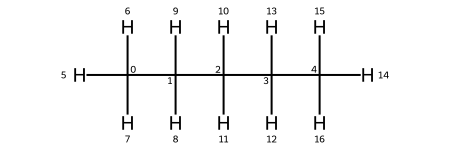

In [3]:
mol = Chem.AddHs(Chem.MolFromSmiles("CCCCC"))
# mol = Chem.AddHs(Chem.MolFromSmiles("OCCCCC=CCCCCO"))
# mol = Chem.AddHs(Chem.MolFromSmiles("C1C(C)CC(CC)CC1"))
mol

First, we build a ``TorsionInfoList`` class object.

By building it with the experimental torsions using ``WithTorsionLibs``, it gets populated with information derived from the Torsion Library.

In [4]:
torInfo = DihedralsInfo.FromTorsionLib(mol)

In [5]:
torInfo.smarts, torInfo.multiplicities, torInfo.torsionTypes, torInfo.indices

(['[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]',
  '[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]'],
 [3, 3],
 [<TorsionType.REGULAR: 1>, <TorsionType.REGULAR: 1>],
 [[0, 1, 2, 3], [1, 2, 3, 4]])

In [6]:
torInfo.GetnTABS()

6

In [7]:
torInfo.GetTABS()

ValueError: No conformers found in molecule.

In [8]:
AllChem.EmbedMultipleConfs(mol, randomSeed=42, numConfs=10)

In [9]:
mol.GetNumConformers()

10

In [10]:
test = DihedralsInfo.FromTorsionLib(mol)
ctors = test.GetConformerTorsions()
ctors

array([[1.04722713, 3.14160212],
       [5.23613491, 5.23606681],
       [1.04709894, 1.04751624],
       [3.14164533, 1.04726229],
       [3.14185206, 5.23617251],
       [3.14159502, 3.14155916],
       [3.14153336, 3.14150147],
       [3.14153691, 3.14158632],
       [3.14150088, 1.04727656],
       [1.04672704, 3.14112578]])

In [11]:
torInfo.GetTABS()

[23, 11, 22, 23, 13, 33, 33, 33, 23, 23]

In [12]:
torInfo.GetTABS(ctors)

[23, 11, 22, 23, 13, 33, 33, 33, 23, 23]

In [13]:
VisualizeEnsemble(mol, dihedral=torInfo.indices[0], showTABS=True);

interactive(children=(IntSlider(value=0, description='confId', max=9), Output()), _dom_classes=('widget-intera…

In [15]:
sorted = SortEnsembleByTABS(mol)

In [16]:
sorted

defaultdict(list, {23: [0, 3, 8, 9], 11: [1], 22: [2], 13: [4], 33: [5, 6, 7]})